University of Aberdeen  
School of Natural and Computing Sciences  
Department of Computing Science  
CS4049 – Introduction toMachine Learning and Data Mining  
2022 – 2023
# Assessment Item 1

# Loading the data

In [57]:
# importing libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [58]:
# importingng the body_fat_data.csv dataset

data_path = os.path.join(os.getcwd(),'body_fat_data.csv')
data = pd.read_csv(data_path, index_col=0) # we load the data into a pandas dataframe, skipping the first column

In [59]:
data.head()

,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
0,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# Preprocessing

Finding and removing outliers

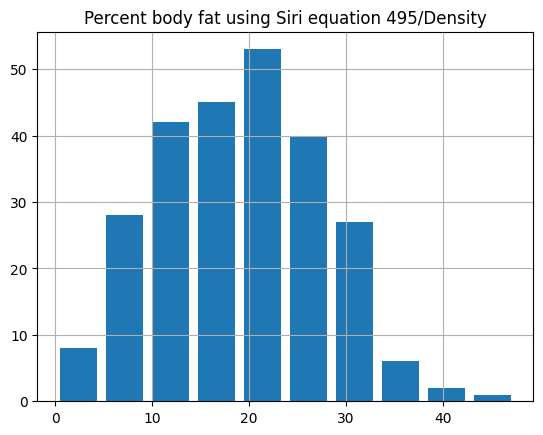

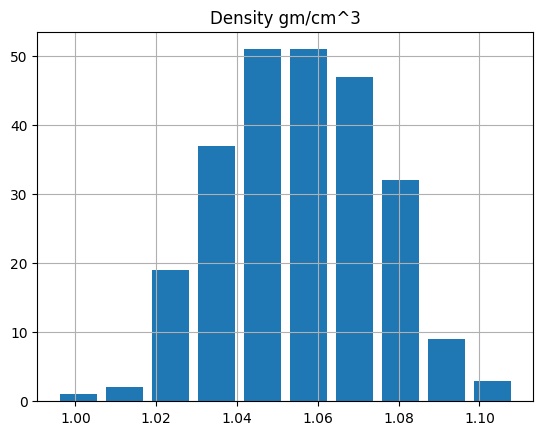

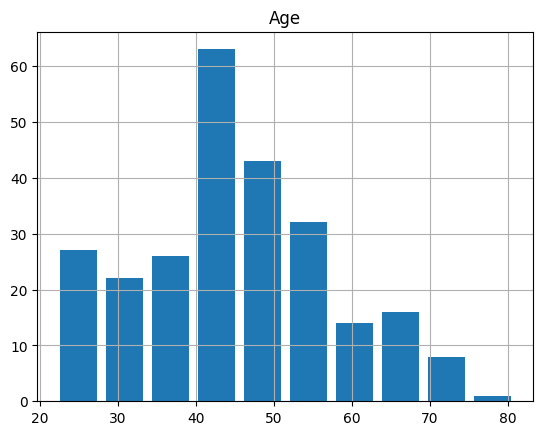

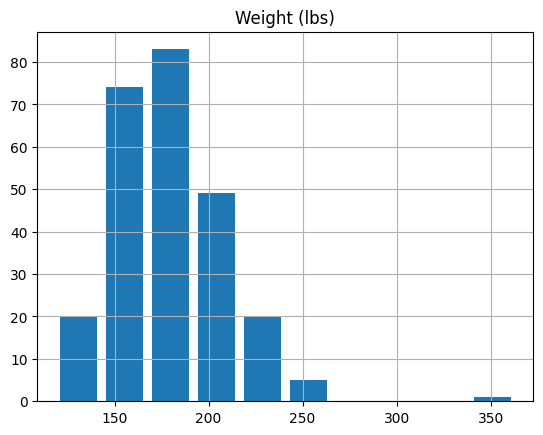

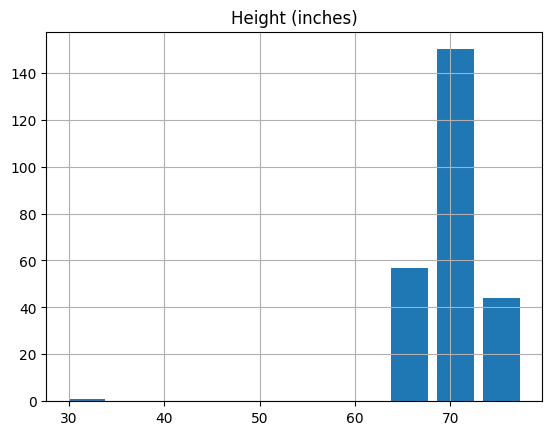

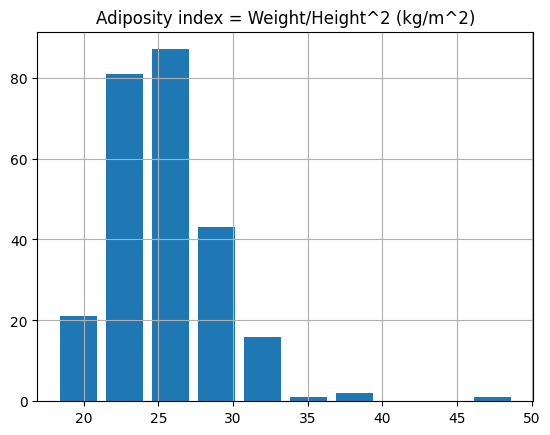

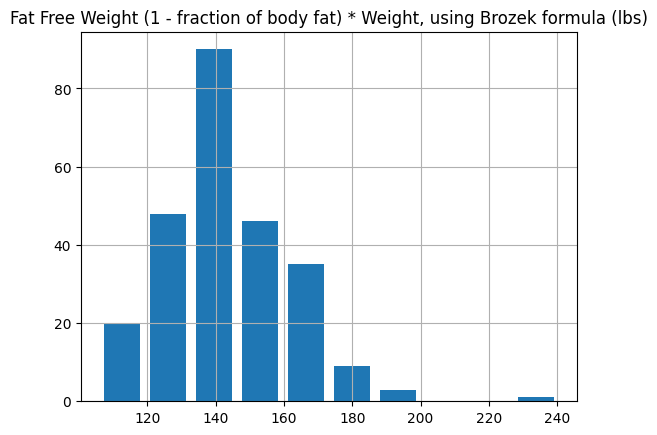

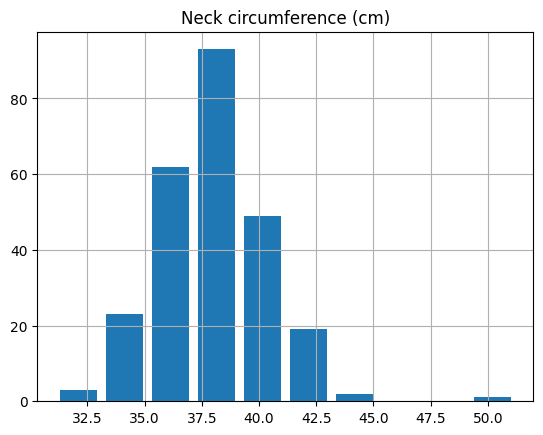

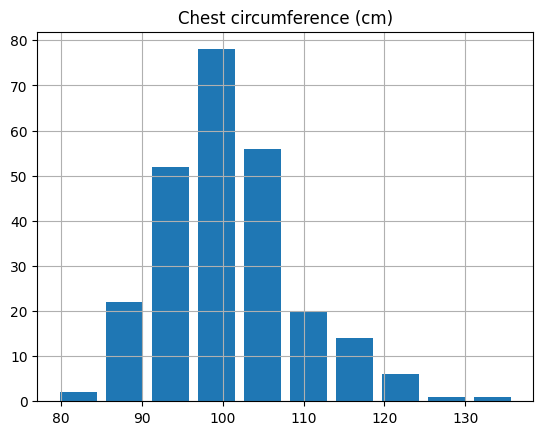

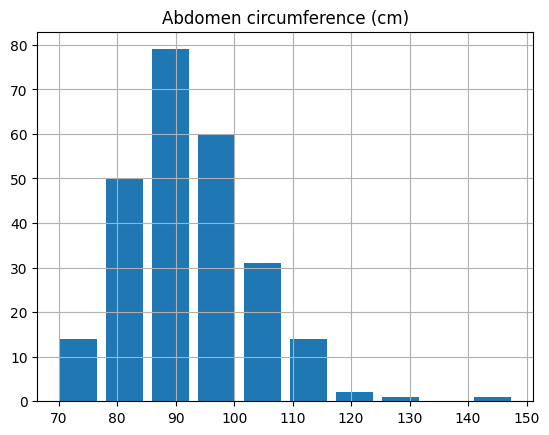

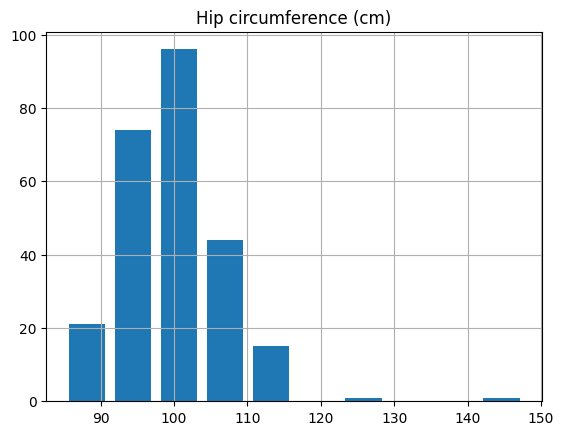

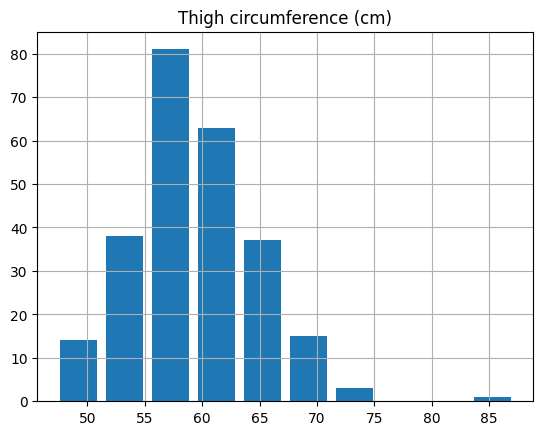

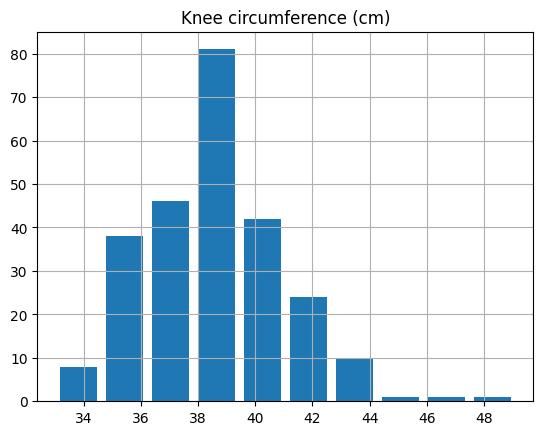

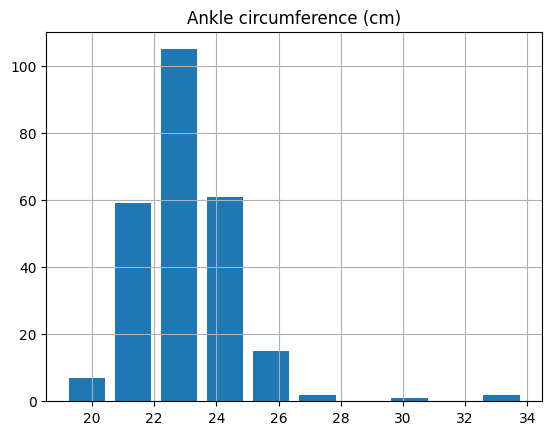

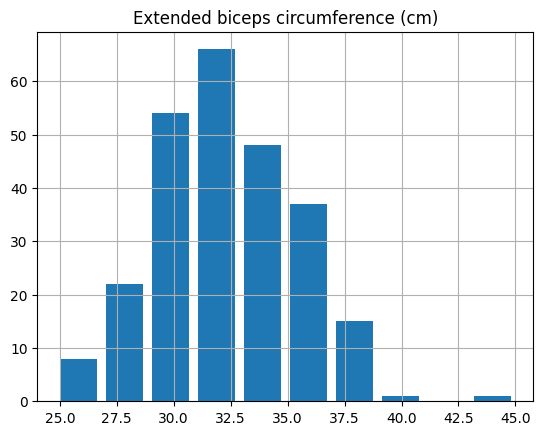

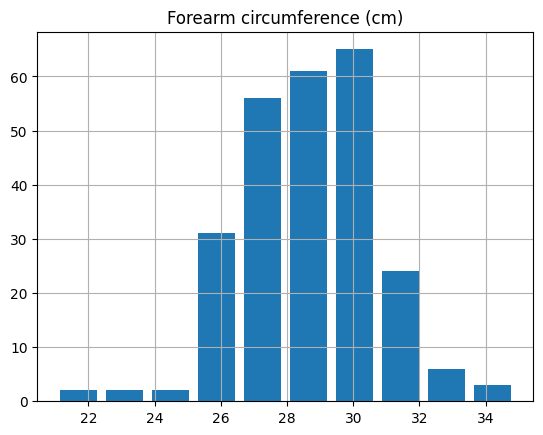

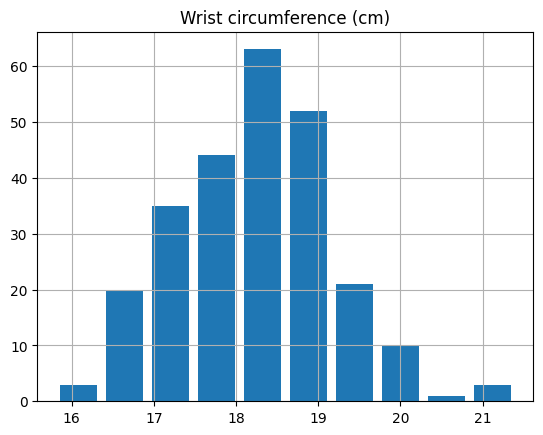

In [60]:
# finding outliers

for col in data.columns:    # plotting each column's values' distribution
    
    plt.hist(data[col], rwidth=0.8)
    plt.grid()
    plt.title(label=col)
    plt.show()

In [61]:
# removing outliers

print(data.shape)
data = data.drop([41, 171, 181]) # 41 - height too low(29.5 in),   171 and 181 - body fat too low(0 and 0.7)
print(data.shape)

(252, 17)
(249, 17)


Feature Selection

In [62]:
# feature selection
# removing columns of data that cannot be measured or calculated only using a scale and measuring tape

data.drop(["Density gm/cm^3", "Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)"], axis=1, inplace=True)

<AxesSubplot: >

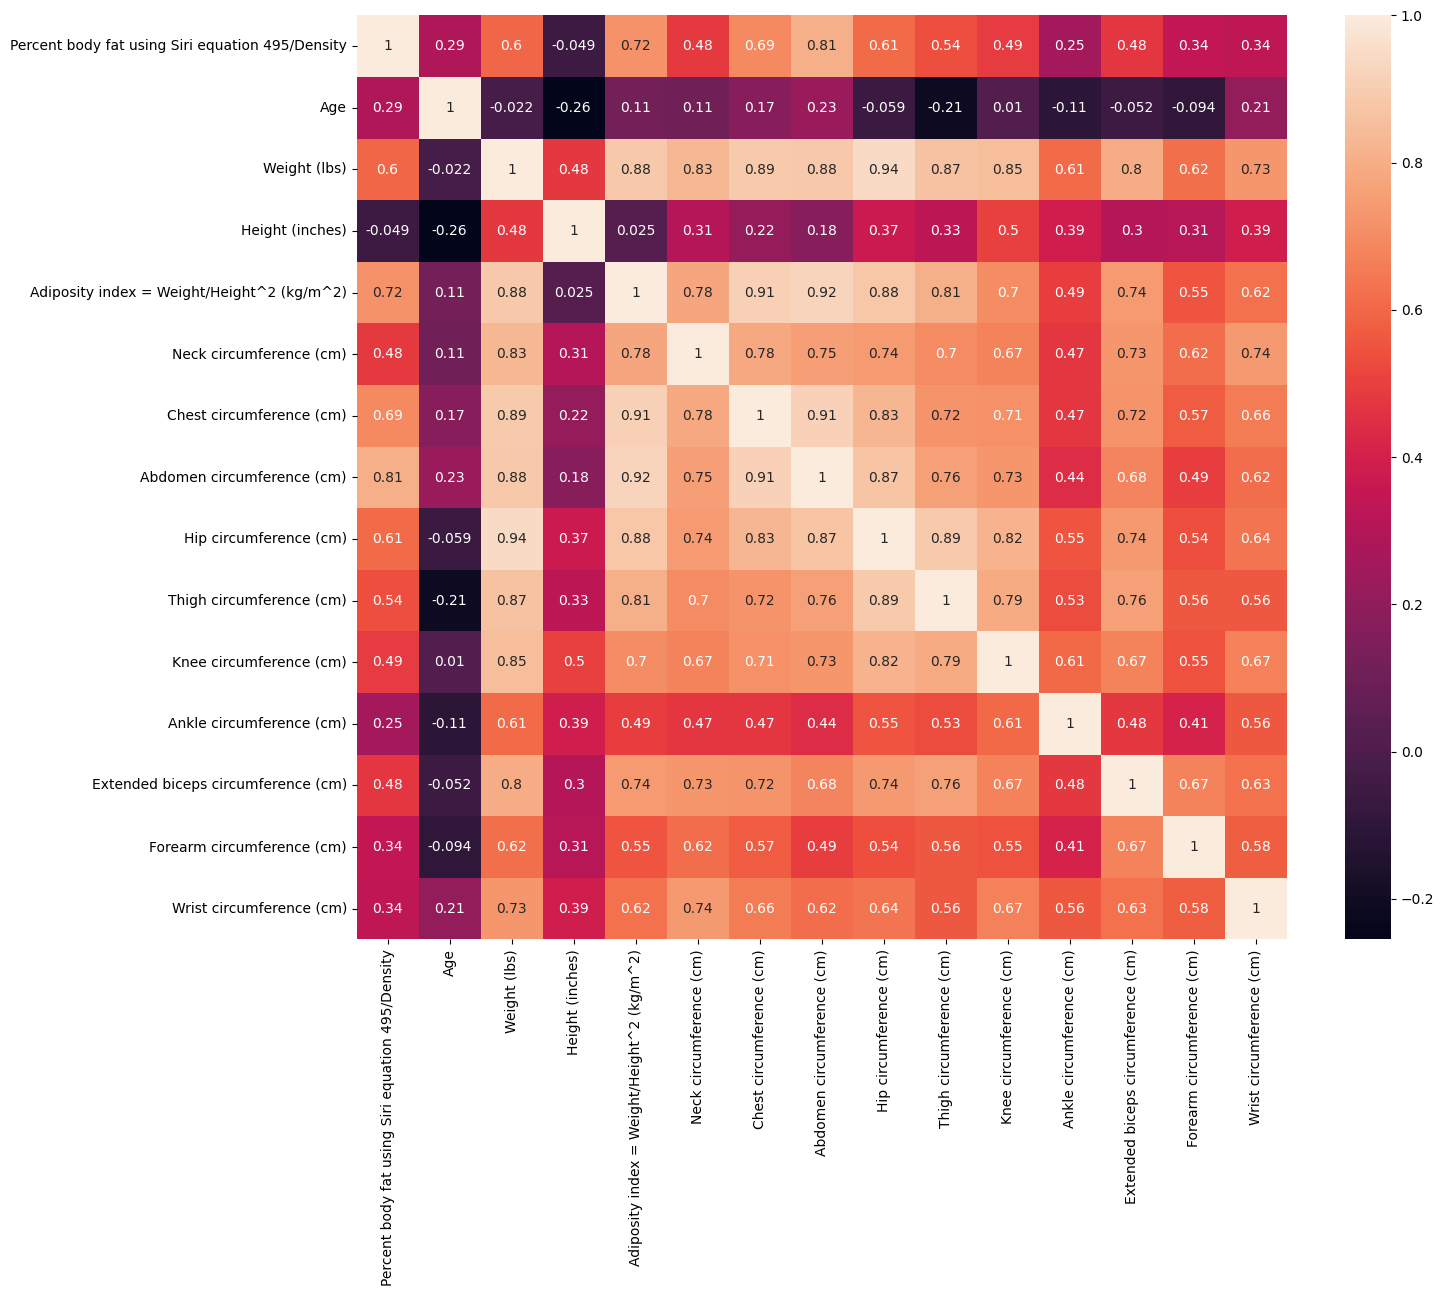

In [63]:
# displaying heatmap to help us eliminate features based on correlation

correlation = data.corr()
plt.figure(figsize = (15,12))
sns.heatmap(correlation, annot = True)

In [64]:
# removing features with least correlation to target value

data.drop(["Age", "Ankle circumference (cm)", "Forearm circumference (cm)"], axis=1, inplace=True)

Standardizing the data

In [65]:
#standardizing the data

standardized = (data-data.mean())/data.std()
standardized

,Percent body fat using Siri equation 495/Density,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Extended biceps circumference (cm),Wrist circumference (cm)
0,-0.847019,-0.860825,-0.994878,-0.488873,-0.757709,-0.938968,-0.700746,-0.773101,-0.087100,-0.550688,-0.105961,-1.235163
1,-1.603004,-0.207275,0.734103,-0.571833,0.194331,-0.879009,-0.907061,-0.176767,-0.145454,-0.550688,-0.608197,-0.048939
2,0.738111,-0.869424,-1.571205,-0.212341,-1.668356,-0.615191,-0.447542,-0.105775,0.029606,0.121681,-1.177399,-1.774355
3,-1.078692,0.188294,0.734103,-0.157035,-0.260992,0.104314,-0.588211,0.178193,0.126862,-0.550688,0.027969,-0.048939
4,1.152684,0.171096,0.349885,0.036538,-1.502784,-0.435315,0.687188,0.277582,0.729846,1.508442,-0.038996,-0.588131
...,...,...,...,...,...,...,...,...,...,...,...,...
247,-1.005532,-1.548772,-1.283041,-1.207856,-1.295818,-1.406646,-0.850793,-1.582410,-1.915503,-1.601264,-2.248838,0.274577
248,1.750156,0.747251,-0.226442,1.004400,1.187764,0.907761,1.156084,0.646741,0.029606,0.920119,0.965478,1.999993
249,1.225844,0.257089,-1.667259,1.308585,0.359903,1.219546,1.765650,0.249185,0.165764,-0.550688,-0.340338,-0.264616
250,0.823465,0.394678,0.061722,0.423683,0.359903,0.883777,0.809101,-0.304553,-0.670633,1.256304,-0.608197,1.676478


# Performing cross validation and creating model

In [66]:
# splitting the data into features and target

X = standardized.iloc[:, 1:].values
y = standardized.iloc [:, 0].values

In [67]:
alphas = np.arange(0, 50.5, 0.5) # creating a range of alpha(lambda) values to try

fold = KFold(n_splits=5, shuffle=True) # initiate KFold with shuffling of the data for a better estimation

In [68]:
# finding the best value for alpha(lambda)

mean_scores_list = []

for i in alphas:
    ridge_model = Ridge(alpha = i) # inintiating a Ridge model
    li = []

    # below split code templated from example (Bronshtein, 2022) cited in report
    for train_index, test_index in fold.split(X): # splitting the data for training and testing 
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        ridge_model.fit(X_train, y_train) # fitting the model to the training data
        score = ridge_model.score(X_test, y_test) # scoring each test

        li.append(score) # save the list of scores to li
    
    mean_scores_list.append([np.mean(li), i]) # find the mean of scores for each alpha value and save to list


best_score_and_alpha = max(mean_scores_list) # storing the highest score and corresponding alpha from all runs

print("[Best mean score, Best alpha]")
print(best_score_and_alpha)

[Best mean score, Best alpha]
[0.6929700267032486, 6.0]


Text(0.5, 0, 'Alpha(Lambda)')

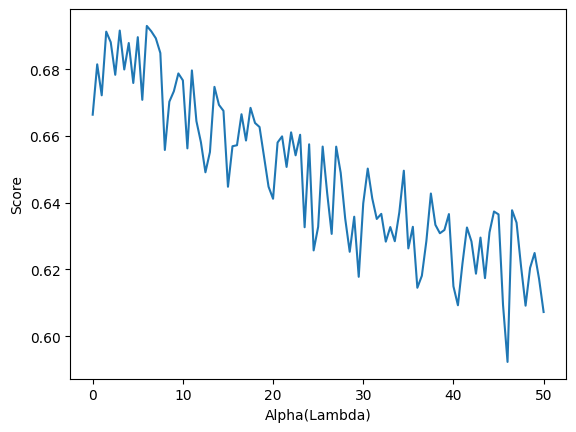

In [69]:
# plotting each score to its corresponding alpha(lambda) value

plt.plot([x[1] for x in mean_scores_list],[np.mean(x[0]) for x in mean_scores_list])
plt.ylabel("Score")
plt.xlabel("Alpha(Lambda)")

# Testing model predictions

0.7041779357661773


Text(0.5, 0, 'Prediction %')

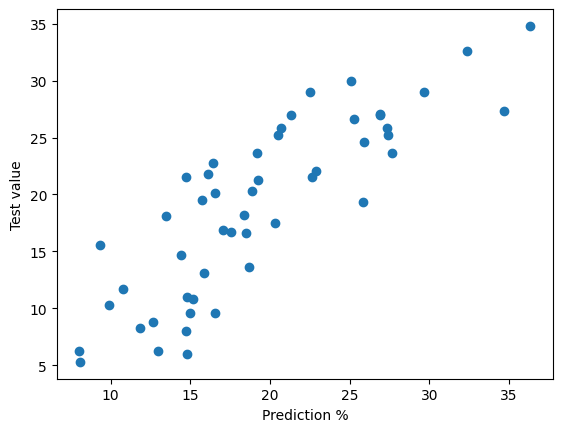

In [70]:
# splitting the non-standardized data for the purposes of testing the model
Xtesting = data.iloc[:, 1:].values
ytesting = data.iloc[:, 0].values

# making a train/test split
X_train, X_test, y_train, y_test = train_test_split(Xtesting, ytesting, test_size=0.2)

# using the selected best alpha(lambda) and fitting the model to the data
ridge = Ridge(alpha=best_score_and_alpha[1]).fit(X_train, y_train)

# plotting predictions against test values
prediction = ridge.predict(X_test)
print(ridge.score(X_test, y_test))
plt.scatter(prediction, y_test)
plt.ylabel("Test value")
plt.xlabel("Prediction %")